# Exploring BatchNormalization
* BN approximates distribution of standardized input data

In [1]:
import tensorflow as tf
import numpy as np; np.random.seed(678)
import matplotlib.pyplot as plt

Min/Max:  -12.475122935407486 267.6997964539736
Mean/Var:  138.37437457200357 5960.611295493191


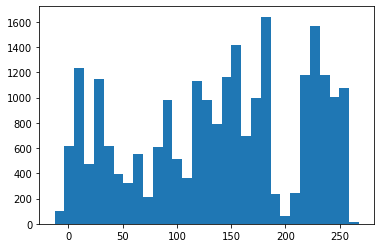

In [2]:
X = np.zeros((30, 28, 28, 1)) # 30 samples
for i in range(30):
    x = np.random.randn(28,28) * np.random.randint(10) + np.random.randint(255)
    x = np.expand_dims(x, axis=2)
    X[i, :, :, :] = x

# plt.imshow(np.squeeze(np.squeeze(X[0,:,:,:])), cmap='gray') # squeeze removes all axis of size 1
print("Min/Max: ", X.min(), X.max())
print("Mean/Var: ", X.mean(), X.var())
plt.hist(X.flatten(), bins='auto');

# 1. (MinMax) Normalize

Min/Max:  0.0 1.0
Mean/Var:  0.5461003386542052 0.09407724005280259


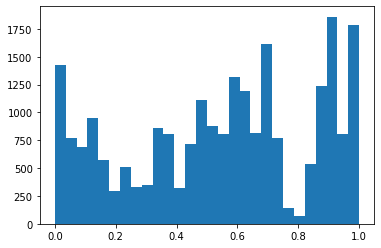

In [4]:
X_norm = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
print("Min/Max: ", X_norm.min(), X_norm.max())
print("Mean/Var: ", X_norm.mean(), X_norm.var())
plt.hist(X_norm.flatten(), bins='auto');

# 2. Standardize

Min/Max:  -1.958780659766158 1.6432882499947472
Mean/Var:  0.0 1.0


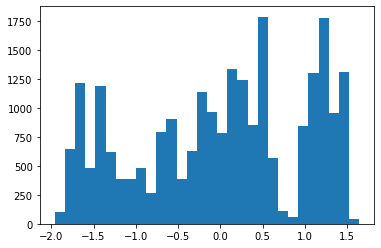

In [5]:
X_std = (X - X.mean(axis=0)) / X.std(axis=0)
print("Min/Max: ", X_std.min(), X_std.max())
print("Mean/Var: ", X_std.mean(), X_std.var())
plt.hist(X_std.flatten(), bins='auto');

# 3. Batch Normalize

Min/Max:  -1.4826635156149148 1.6726636542239683
Mean/Var:  0.20448803778953595 0.7642652206248977


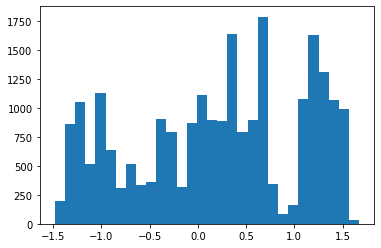

In [5]:
X_batch = X[:10, :, :, :] # mini batch

# moving mean = array of mini-batch averages of whole dataset.
# After epoch, data is shuffled, moving mean calculated anew? -> Yes, they are updated.
X_batch_mean = X_batch.sum(axis=0) / X_batch.shape[0] # moving mean
X_batch_var = ((X_batch - X_batch_mean)**2).sum(axis=0) / X_batch.shape[0] # moving var

X_bn = (X - X_batch_mean) / np.sqrt(X_batch_var + 1e-8) # 1e-8: small no. avoid div by 0

print("Min/Max: ", X_bn.min(), X_bn.max())
print("Mean/Var: ", X_bn.mean(), X_bn.var())
plt.hist(X_bn.flatten(), bins='auto');

# 3.1 Batch Norm with TF
* This should be equivalent to BatchNorm by hand.
* Why is it different?

Min/Max:  -1.482663515614915 1.5780922719364125
Mean/Var:  2.9001744316738786e-17 0.9999999999987176


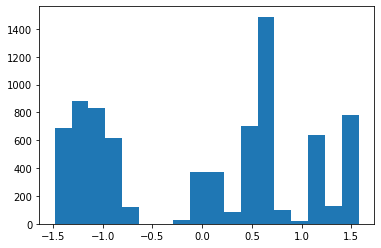

In [4]:
X_batch = X[:10, :, :, :] # mini batch

X_bn = tf.nn.batch_normalization(X_batch,
                             mean=X_batch.mean(axis=0),
                             variance=X_batch.var(axis=0),
                             offset=0.0, scale=1.0,
                             variance_epsilon=1e-8).numpy()

print("Min/Max: ", X_bn.min(), X_bn.max())
print("Mean/Var: ", X_bn.mean(), X_bn.var())
plt.hist(X_bn.flatten(), bins='auto');